In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
#Importing Datasets
df_fake = pd.read_csv("input/fake-news-detection/Fake.csv")
df_true = pd.read_csv("input/fake-news-detection/True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#Declaring that Fake News is 0 and Non Fake News is 1
df_fake["class"] = 0
df_true["class"] = 1

In [5]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [6]:
#We want to grab a sample from the tail end of the data
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_true_manual_testing = df_true.tail(10)    
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [7]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [8]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\PatricNurczyk\AppData\Local\Temp\ipykernel_26788\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\PatricNurczyk\AppData\Local\Temp\ipykernel_26788\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [9]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
#Turning the sample in a .csv
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [12]:
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
#Dropping unneccessary data
df = df_merge.drop(["title","subject","date"], axis = 1)

In [15]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
df = df.sample(frac = 1)

In [17]:
df.head()

,text,class
12768,HERE S ANOTHER VIEW:Watch Trump invite little ...,0
3849,NEW YORK (Reuters) - Four U.S. states have sue...,1
611,After news broke that Kim Jong Un might be cap...,0
13091,When Obama had the opportunity to speak out ag...,0
20621,Wow! This 21 year old Texan woman recently pen...,0


In [18]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [19]:
df.columns

Index(['text', 'class'], dtype='object')

In [20]:
df.head()

,text,class
0,HERE S ANOTHER VIEW:Watch Trump invite little ...,0
1,NEW YORK (Reuters) - Four U.S. states have sue...,1
2,After news broke that Kim Jong Un might be cap...,0
3,When Obama had the opportunity to speak out ag...,0
4,Wow! This 21 year old Texan woman recently pen...,0


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [22]:
df["text"] = df["text"].apply(wordopt)

In [23]:
x = df["text"]
y = df["class"]

In [24]:
#Assigning data to set to train and test (75% train 25% test)(x = text, y = whether it is fake news)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorizes the text 
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
#Logistic Regression: Uses past occurances to predict the probability that something will occur
#Similar to linear regression however will form a S curve or Sigmoid function (Binary Dependant Variables)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [27]:
pred_lr = LR.predict(xv_test)

In [28]:
LR.score(xv_test, y_test)

0.9859180035650624

In [29]:
#Precision: shows amount of correct positives vs. total positive responses (Closer to 1 is better)
#Recall: shows amount of correct positives vs. total possible positives (Closer to 1 is better)
#F1-Score: (2(precision * recall))/(precision + recall) (Closer to 1 is better)
#Support: Displays all entrys that match with the corresponding y (0 or 1)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5944
           1       0.98      0.99      0.99      5276

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [30]:
#Decision Tree Classifier: Uses a set of rules on decision making. Organizing the dataset in a tree structure based on dataset features.
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(xv_test)

In [32]:
DT.score(xv_test, y_test)

0.9962566844919786

In [33]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5944
           1       1.00      1.00      1.00      5276

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [34]:
#Gradient Boosting Classifier: Combines several weak learners into a strong learner. Each model learns from the previous model's mistakes
#Tries to improve each time by reducing the amount of errors

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
pred_gbc = GBC.predict(xv_test)

In [36]:
GBC.score(xv_test, y_test)

0.9958110516934047

In [37]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5944
           1       0.99      1.00      1.00      5276

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [38]:
#Random Forest Classifier: Constructs a multitude of decision trees, then picks the option that most of the decision trees has led to. 
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RandomForestClassifier()

In [39]:
pred_RFC = RFC.predict(xv_test)

In [40]:
RFC.score(xv_test, y_test)

0.9893048128342246

In [41]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5944
           1       0.99      0.99      0.99      5276

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_text = vectorization.transform(new_x_test)
    #Runs the predictions for each algorithm
    pred_LR = LR.predict(new_xv_text)
    pred_DT = DT.predict(new_xv_text)
    pred_GBC = GBC.predict(new_xv_text)
    pred_RFC = RFC.predict(new_xv_text)
    
    return print(f"\n\nLogistic Regression Prediction: {output_label(pred_LR[0])} \nDecision Tree Prediction: {output_label(pred_DT[0])} \nGradient Boosting Classifier Prediction: {output_label(pred_GBC[0])} \nRandom Forest Classifier Prediction: {output_label(pred_RFC[0])}")

NameError: name 'svc_disp' is not defined

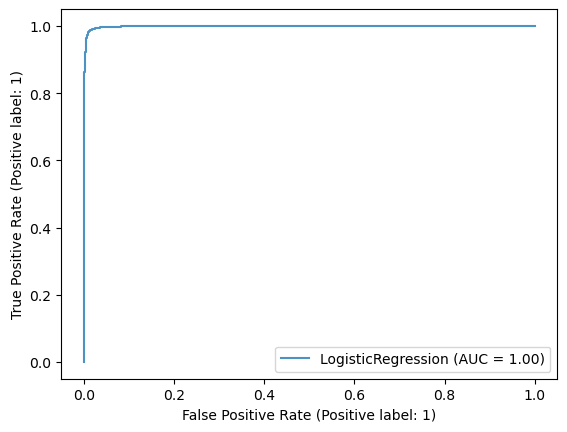

In [50]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(LR, xv_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

Text(0.5, 1.0, 'Differences in Scores Between Machine Learning Models')

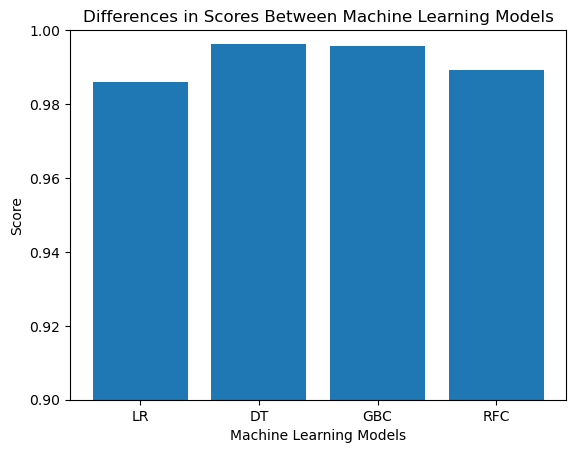

In [72]:
data = {'LR':LR.score(xv_test, y_test), 'DT':DT.score(xv_test, y_test), 'GBC':GBC.score(xv_test, y_test),
        'RFC':RFC.score(xv_test, y_test)}

plt.bar(data.keys(), data.values())
plt.ylim(.9, 1)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Differences in Scores Between Machine Learning Models")

Text(0.5, 1.0, 'Validity of News Based on Length of Words')

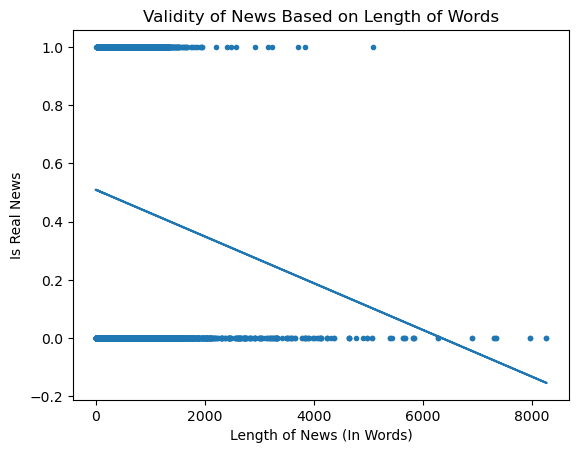

In [94]:
wordLen = []
for index, row in df.iterrows():
    wordLen.append(int(len(row["text"].split())))
plt.scatter(wordLen,df['class'],marker='.')
xbar = sum(wordLen)/len(wordLen)
ybar = sum(df['class'])/len(df['class'])
n = len(wordLen)

numer = sum([xi*yi for xi,yi in zip(wordLen, df['class'])]) - n * xbar * ybar
denum = sum([xi**2 for xi in wordLen]) - n * xbar**2

b = numer / denum
a = ybar - b * xbar
yfit = [a + b * xi for xi in wordLen]
plt.plot(wordLen, yfit)
plt.xlabel("Length of News (In Words)")
plt.ylabel("Is Real News")
plt.title("Validity of News Based on Length of Words")

In [119]:
vectorizer_fake = TfidfVectorizer(min_df=.5)
X_fake = vectorizer_fake.fit_transform(df_fake["text"]).todense()
df_fake_words = pd.DataFrame(X_fake, columns=vectorizer_fake.get_feature_names_out())
df_fake_words.head()

,about,all,an,and,are,as,at,be,but,by,...,this,to,trump,was,we,what,when,who,with,you
0,0.039890,0.260373,0.000000,0.399165,0.037539,0.140492,0.073130,0.070570,0.038733,0.036007,...,0.133999,0.394874,0.300261,0.000000,0.000000,0.087002,0.044483,0.110885,0.000000,0.301368
1,0.052685,0.000000,0.000000,0.188286,0.000000,0.139167,0.096587,0.000000,0.153471,0.095113,...,0.044245,0.335270,0.339918,0.140359,0.000000,0.114908,0.117503,0.000000,0.215599,0.000000
2,0.000000,0.000000,0.036654,0.216020,0.035552,0.000000,0.103888,0.066834,0.000000,0.272807,...,0.095179,0.454107,0.040624,0.134195,0.078613,0.000000,0.084257,0.105015,0.216437,0.203868
3,0.070716,0.076932,0.034306,0.151637,0.066549,0.031133,0.129645,0.093829,0.102999,0.095750,...,0.178165,0.250012,0.380216,0.125599,0.036789,0.038559,0.039430,0.065526,0.028939,0.076324
4,0.058834,0.032003,0.085625,0.294370,0.055367,0.103608,0.026965,0.078064,0.028564,0.053108,...,0.049410,0.416007,0.094899,0.052248,0.091822,0.000000,0.000000,0.136290,0.000000,0.000000


In [120]:
vectorizer_true = TfidfVectorizer(min_df=0.5)
X_true = vectorizer_true.fit_transform(df_true["text"]).todense()
df_true_words = pd.DataFrame(X_true, columns=vectorizer_true.get_feature_names_out())
df_true_words.head()

,after,an,and,are,as,at,be,but,by,for,...,that,the,this,to,was,which,who,will,with,would
0,0.023317,0.019792,0.239204,0.045766,0.132141,0.000000,0.122906,0.044091,0.109884,0.251966,...,0.082029,0.620273,0.069988,0.435689,0.037425,0.115325,0.090657,0.162569,0.071275,0.066528
1,0.024406,0.020717,0.172134,0.023952,0.039518,0.042554,0.085765,0.046151,0.115017,0.087912,...,0.240409,0.664002,0.024419,0.440839,0.000000,0.048285,0.023723,0.097236,0.037302,0.139271
2,0.000000,0.179274,0.293405,0.069090,0.113992,0.092062,0.061848,0.066562,0.055295,0.025359,...,0.123835,0.595888,0.070438,0.219246,0.084748,0.069640,0.034215,0.070121,0.107600,0.033478
3,0.045092,0.038276,0.318035,0.044253,0.036507,0.000000,0.000000,0.000000,0.141670,0.097455,...,0.126909,0.708823,0.045116,0.280860,0.180941,0.089211,0.043830,0.000000,0.068919,0.042886
4,0.000000,0.085567,0.206831,0.019786,0.032645,0.070306,0.035424,0.057186,0.110848,0.188817,...,0.127669,0.694789,0.020172,0.263707,0.032360,0.119660,0.019597,0.000000,0.107851,0.019175
